<a href="https://colab.research.google.com/github/Rayatcoding/Chest-X-Rays-Classification/blob/main/DeepLearn_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.1 Download data and unzip to google drive

In [ ]:
# prompt: download the https://www.kaggle.com/datasets/nih-chest-xrays/data/data to google drive '/content/drive/MyDrive/CS7643_DL_project/Dataset' and unzip there

import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the destination path
destination_path = '/content/drive/MyDrive/CS7643_DL_project/Dataset'

# Create the destination directory if it doesn't exist
if not os.path.exists(destination_path):
    os.makedirs(destination_path)

# Download the Kaggle dataset (replace with your actual Kaggle dataset link)
!kaggle datasets download -d nih-chest-xrays/data -p {destination_path}

# Unzip the downloaded dataset
!unzip -n -q {destination_path}/data.zip -d {destination_path}

# Remove the zip file
# !rm {destination_path}/data.zip

Mounted at /content/drive
Dataset URL: https://www.kaggle.com/datasets/nih-chest-xrays/data
License(s): CC0-1.0
100% 42.0G/42.0G [12:07<00:01, 4.31MB/s]
100% 42.0G/42.0G [12:07<00:00, 62.0MB/s]


1.2 Move and re-organize data

In [ ]:
import os
import shutil
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define paths
dataset_path = '/content/drive/MyDrive/CS7643_DL_project/Dataset'
test_list_path = os.path.join(dataset_path, 'test_list.txt')
test_set_path = os.path.join(dataset_path, 'Test_set')
train_set_path = os.path.join(dataset_path, 'Train_set')

# Create Test_set and Train_set directories if they don't exist
os.makedirs(test_set_path, exist_ok=True)
os.makedirs(train_set_path, exist_ok=True)

# Read test file names from test_list.txt
with open(test_list_path, 'r') as f:
  test_files = [line.strip() for line in f]

# Iterate through all files in the dataset directory and its subdirectories
for root, _, files in os.walk(dataset_path):
  # Skip train_set and test_set directories
  if root == test_set_path or root == train_set_path:
    continue

  for filename in files:
    if filename.endswith(".png"):
      file_path = os.path.join(root, filename)

      # Check if the file is in the test list
      if filename in test_files:
        # Construct the destination path
        destination_path = os.path.join(test_set_path, filename)

        # Check if the file already exists in the destination
        if os.path.exists(destination_path):
          print(f"Skipped: {file_path} (already in Test_set)")
          continue  # Skip to the next file

        # Move to Test_set
        shutil.move(file_path, test_set_path)
        print(f"Moved: {file_path} to {test_set_path}")
      else:
        # Construct the destination path
        destination_path = os.path.join(train_set_path, filename)

        # Check if the file already exists in the destination
        if os.path.exists(destination_path):
          print(f"Skipped: {file_path} (already in Train_set)")
          continue  # Skip to the next file

        # Move to Train_set
        shutil.move(file_path, train_set_path)
        print(f"Moved: {file_path} to {train_set_path}")

print("Image classification and movement complete.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Image classification and movement complete.


1.3 Create Test Data ID to Label Mapping

In [ ]:
import pandas as pd

# Define file paths
test_list_path = '/content/drive/MyDrive/CS7643_DL_project/Dataset/test_list.txt'
data_entry_path = '/content/drive/MyDrive/CS7643_DL_project/Dataset/Data_Entry_2017.csv'
output_path = '/content/drive/MyDrive/CS7643_DL_project/Dataset/test_set_label.csv'  # Change output file extension

# Read test_id from test_list.txt
with open(test_list_path, 'r') as f:
    test_ids = [line.strip() for line in f]

# Read Data_Entry_2017.csv file
data_entry = pd.read_csv(data_entry_path)

# Create a list to store data
test_labels = []

# Iterate through test_ids, find the corresponding label in data_entry
for test_id in test_ids:
    label = data_entry.loc[data_entry['Image Index'] == test_id, 'Finding Labels'].iloc[0]
    test_labels.append([test_id, label])  # Add data to the list

# Create DataFrame and save as CSV file
df = pd.DataFrame(test_labels, columns=['Image Index', 'Finding Labels'])
df.to_csv(output_path, index=False)  # index=False to avoid writing row index

print(f'Generated test_set_label file: {output_path}')

Mounted at /content/drive
已生成 test_set_label 文件：/content/drive/MyDrive/CS7643_DL_project/Dataset/test_set_label.csv


1.4 Create Mini version of Trainset and Testset, 10% of original

In [ ]:
import pandas as pd
import os
import shutil
from sklearn.model_selection import train_test_split

# create paths
test_set_label_path = '/content/drive/MyDrive/CS7643_DL_project/Dataset/test_set_label.csv'
test_set_path = '/content/drive/MyDrive/CS7643_DL_project/Dataset/Test_set'
test_set_mini_path = '/content/drive/MyDrive/CS7643_DL_project/Dataset/Test_set_mini'
train_val_list_path = '/content/drive/MyDrive/CS7643_DL_project/Dataset/train_val_list.txt'
data_entry_path = '/content/drive/MyDrive/CS7643_DL_project/Dataset/Data_Entry_2017.csv'
train_set_path = '/content/drive/MyDrive/CS7643_DL_project/Dataset/Train_set'
train_set_mini_path = '/content/drive/MyDrive/CS7643_DL_project/Dataset/Train_set_mini'
test_list_path = '/content/drive/MyDrive/CS7643_DL_project/Dataset/test_list.txt' # 添加 test_list.txt 的路径


# check if dirs exist
os.makedirs(test_set_mini_path, exist_ok=True)
os.makedirs(train_set_mini_path, exist_ok=True)

# --- process testset ---

test_labels_df = pd.read_csv(test_set_label_path)

# get 10% of each label category
test_labels_mini_df = test_labels_df.groupby('Finding Labels').apply(lambda x: x.sample(frac=0.1)).reset_index(drop=True)

test_labels_mini_df.to_csv(os.path.join(os.path.dirname(test_set_label_path), 'test_set_label_mini.csv'), index=False)

# copy the images to new folder
for _, row in test_labels_mini_df.iterrows():
    image_name = row['Image Index']
    source_path = os.path.join(test_set_path, image_name)
    destination_path = os.path.join(test_set_mini_path, image_name)
    shutil.copy(source_path, destination_path)

print("Test set mini created.")

# --- process trainset ---

with open(train_val_list_path, 'r') as f:
    train_val_list = [line.strip() for line in f]

with open(test_list_path, 'r') as f:
    test_list = [line.strip() for line in f]

# make sure trainset images only
train_val_list = [image for image in train_val_list if image not in test_list]

data_entry_df = pd.read_csv(data_entry_path)

train_val_df = data_entry_df[data_entry_df['Image Index'].isin(train_val_list)]

# reduce to 10% of original trainset
train_val_mini_df = train_val_df.groupby('Finding Labels').apply(lambda x: x.sample(frac=0.1)).reset_index(drop=True)

# save the mini trainset label
train_val_mini_df.to_csv(os.path.join(os.path.dirname(data_entry_path), 'train_set_label_mini.csv'), index=False)


# copy
for _, row in train_val_mini_df.iterrows():
    image_name = row['Image Index']
    source_path = os.path.join(train_set_path, image_name)
    destination_path = os.path.join(train_set_mini_path, image_name)
    shutil.copy(source_path, destination_path)

print("Train set mini created.")

<ipython-input-2-9c15cec4ffea>:27: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  test_labels_mini_df = test_labels_df.groupby('Finding Labels').apply(lambda x: x.sample(frac=0.1)).reset_index(drop=True)


Test set mini created.


<ipython-input-2-9c15cec4ffea>:61: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  train_val_mini_df = train_val_df.groupby('Finding Labels').apply(lambda x: x.sample(frac=0.1)).reset_index(drop=True)


Train set mini created.


1.5 Testset Evaluation on AlexNet,ResNet152,Inception_V3

In [ ]:
import os
import torch
import torchvision.transforms as transforms
from torchvision import models
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from sklearn.metrics import f1_score, roc_auc_score
import pandas as pd
from tqdm import tqdm
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

test_set_path = '/content/drive/MyDrive/CS7643_DL_project/Dataset/Test_set_mini'
# test_set_path = '/content/drive/MyDrive/CS7643_DL_project/Dataset/Test_set'
test_set_label_path = '/content/drive/MyDrive/CS7643_DL_project/Dataset/test_set_label_mini.csv'
# test_set_label_path = '/content/drive/MyDrive/CS7643_DL_project/Dataset/test_set_label.csv'
output_path = '/content/drive/MyDrive/CS7643_DL_project/Dataset/evaluation_results.csv'

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

test_labels_df = pd.read_csv(test_set_label_path)
test_labels = {row['Image Index']: row['Finding Labels'] for _, row in test_labels_df.iterrows()}

all_labels = sorted(set(label for labels in test_labels.values() for label in labels.split('|')))
label_to_idx = {label: idx for idx, label in enumerate(all_labels)}
print(f"Unique labels: {all_labels}")
print(f"Number of labels: {len(all_labels)}")

# one hot encoding
def encode_labels(labels):
    encoded = [0] * len(label_to_idx)
    for label in labels.split('|'):
        encoded[label_to_idx[label]] = 1
    return encoded

# image pre-process
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# create dataset
class TestDataset(Dataset):
    def __init__(self, image_dir, labels, transform=None):
        self.image_dir = image_dir
        self.labels = labels
        self.transform = transform
        self.image_names = os.listdir(image_dir)

    def __len__(self):
        return len(self.image_names)

    def __getitem__(self, idx):
        image_name = self.image_names[idx]
        image_path = os.path.join(self.image_dir, image_name)
        image = Image.open(image_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        label = encode_labels(self.labels[image_name])  # change to multi one hot encoding
        return image, torch.tensor(label)  # tensor vector

test_dataset = TestDataset(test_set_path, test_labels, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)
print(f"Number of images in test set: {len(test_dataset)}")

# model
models_dict = {
    'AlexNet': models.alexnet(weights=models.AlexNet_Weights.DEFAULT),
    'ResNet152': models.resnet152(weights=models.ResNet152_Weights.DEFAULT),
    'Inception_V3': models.inception_v3(weights=models.Inception_V3_Weights.DEFAULT)
}

# modify ouput layer
num_classes = len(all_labels)
for model_name, model in models_dict.items():
    if hasattr(model, 'fc'):  # ResNet and Inception-V3
        model.fc = torch.nn.Linear(model.fc.in_features, num_classes)
    elif hasattr(model, 'classifier'):  # AlexNet
        model.classifier[6] = torch.nn.Linear(model.classifier[6].in_features, num_classes)
    models_dict[model_name] = model.to(device)

# loss function
criterion = torch.nn.BCEWithLogitsLoss()

results = []

for model_name, model in models_dict.items():
    model.eval()
    all_predictions = []
    all_labels = []
    processed_images = 0
    print(f"Evaluating model: {model_name}")

    # loopover DataLoader
    with tqdm(total=len(test_loader), desc=f"Evaluating {model_name}", unit="batch") as pbar:
      for images, labels in test_loader:
          images = images.to(device)
          labels = labels.to(device)

          with torch.no_grad():
              output = model(images)
              probs = torch.sigmoid(output)
              all_predictions.extend(probs.cpu().numpy())
              all_labels.extend(labels.cpu().numpy())

          # progress updates
          processed_images += images.size(0)
          pbar.update(1)
          pbar.set_postfix({"Processed images": processed_images})

    auc = roc_auc_score(all_labels, all_predictions, average='weighted', multi_class='ovr')
    ce_loss = criterion(torch.tensor(all_predictions, dtype=torch.float32),torch.tensor(all_labels, dtype=torch.float32)).item()
    f1 = f1_score(all_labels, (torch.tensor(all_predictions) > 0.5).int(), average='weighted')
    print(f"Model: {model_name}, CE Loss: {ce_loss}, F1-score: {f1}, AUC: {auc}")
    results.append([model_name, ce_loss, f1, auc])

results_df = pd.DataFrame(results, columns=['Model', 'CE Loss', 'F1-score', 'AUC'])
results_df.to_csv(output_path, index=False)
print(f"Results saved to {output_path}")


In [ ]:
df = pd.read_csv(output_path)
df

,Model,CE Loss,F1-score,AUC
0,AlexNet,0.909271,0.251376,0.469882
1,ResNet152,0.928557,0.274560,0.498605
2,Inception_V3,0.936244,0.287510,0.500713


1.6 Train the AlexNet and do evaluation

Using device: cuda


Epoch 1/20: 100%|██████████| 135/135 [03:34<00:00,  1.59s/it]


Epoch 1, Loss: 0.0144


Epoch 2/20: 100%|██████████| 135/135 [01:52<00:00,  1.20it/s]


Epoch 2, Loss: 0.0140


Epoch 3/20: 100%|██████████| 135/135 [01:52<00:00,  1.20it/s]


Epoch 3, Loss: 0.0131


Epoch 4/20: 100%|██████████| 135/135 [01:51<00:00,  1.21it/s]


Epoch 4, Loss: 0.0131


Epoch 5/20: 100%|██████████| 135/135 [01:51<00:00,  1.21it/s]


Epoch 5, Loss: 0.0130


Epoch 6/20: 100%|██████████| 135/135 [01:47<00:00,  1.26it/s]


Epoch 6, Loss: 0.0127


Epoch 7/20: 100%|██████████| 135/135 [01:51<00:00,  1.21it/s]


Epoch 7, Loss: 0.0126


Epoch 8/20: 100%|██████████| 135/135 [01:51<00:00,  1.21it/s]


Epoch 8, Loss: 0.0125


Epoch 9/20: 100%|██████████| 135/135 [01:51<00:00,  1.21it/s]


Epoch 9, Loss: 0.0125


Epoch 10/20: 100%|██████████| 135/135 [01:51<00:00,  1.21it/s]


Epoch 10, Loss: 0.0124


Epoch 11/20: 100%|██████████| 135/135 [01:51<00:00,  1.21it/s]


Epoch 11, Loss: 0.0123


Epoch 12/20: 100%|██████████| 135/135 [01:51<00:00,  1.21it/s]


Epoch 12, Loss: 0.0123


Epoch 13/20: 100%|██████████| 135/135 [01:51<00:00,  1.21it/s]


Epoch 13, Loss: 0.0123


Epoch 14/20: 100%|██████████| 135/135 [01:51<00:00,  1.21it/s]


Epoch 14, Loss: 0.0123


Epoch 15/20: 100%|██████████| 135/135 [01:52<00:00,  1.20it/s]


Epoch 15, Loss: 0.0123


Epoch 16/20: 100%|██████████| 135/135 [01:52<00:00,  1.20it/s]


Epoch 16, Loss: 0.0123


Epoch 17/20: 100%|██████████| 135/135 [01:52<00:00,  1.20it/s]


Epoch 17, Loss: 0.0122


Epoch 18/20: 100%|██████████| 135/135 [01:51<00:00,  1.21it/s]


Epoch 18, Loss: 0.0122


Epoch 19/20: 100%|██████████| 135/135 [01:51<00:00,  1.21it/s]


Epoch 19, Loss: 0.0123


Epoch 20/20: 100%|██████████| 135/135 [01:52<00:00,  1.21it/s]


Epoch 20, Loss: 0.0123


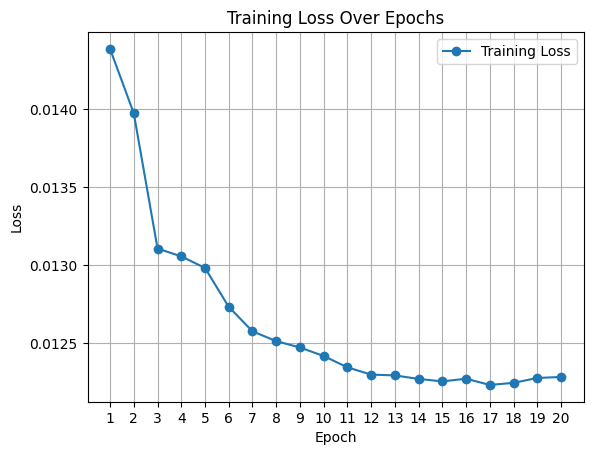

Evaluating: 100%|██████████| 78/78 [00:32<00:00,  2.44it/s]


AttributeError: 'list' object has no attribute 'size'

In [ ]:
import os
import torch
import torchvision.transforms as transforms
from torchvision import models
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from sklearn.metrics import f1_score, roc_auc_score
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

# paths
train_set_mini_path = '/content/drive/MyDrive/CS7643_DL_project/Dataset/Train_set_mini'
test_set_mini_path = '/content/drive/MyDrive/CS7643_DL_project/Dataset/Test_set_mini'
test_set_label_mini_path = '/content/drive/MyDrive/CS7643_DL_project/Dataset/test_set_label_mini.csv'
train_set_label_mini_path = '/content/drive/MyDrive/CS7643_DL_project/Dataset/train_set_label_mini.csv'  # train_set_label_mini.csv 文件路径
data_entry_path = '/content/drive/MyDrive/CS7643_DL_project/Dataset/Data_Entry_2017.csv'


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

data_entry_df = pd.read_csv(data_entry_path)
test_labels_mini_df = pd.read_csv(test_set_label_mini_path)
train_labels_df = pd.read_csv(train_set_label_mini_path)

train_labels = {row['Image Index']: row['Finding Labels'] for _, row in train_labels_df.iterrows()}  # 创建 train_labels 字典
test_labels = {row['Image Index']: row['Finding Labels'] for _, row in test_labels_mini_df.iterrows()}  # 创建 test_labels 字典

all_labels = sorted(set(label for labels in train_labels.values() for label in labels.split('|')))
label_to_idx = {label: idx for idx, label in enumerate(all_labels)}

# onehot encoding
def encode_labels(labels):
    encoded = [0] * len(label_to_idx)
    for label in labels.split('|'):
        if label in label_to_idx:
            encoded[label_to_idx[label]] = 1
    return encoded

# image preprocessing
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# class to handle dataset
class CustomDataset(Dataset):
    def __init__(self, image_dir, labels, transform=None):
        self.image_dir = image_dir
        self.labels = labels
        self.transform = transform
        self.image_names = [f for f in os.listdir(image_dir) if f in labels]

    def __len__(self):
        return len(self.image_names)

    def __getitem__(self, idx):
        image_name = self.image_names[idx]
        image_path = os.path.join(self.image_dir, image_name)
        image = Image.open(image_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        label = torch.tensor(encode_labels(self.labels[image_name]), dtype=torch.float32)  # 转为张量
        return image, label

train_dataset = CustomDataset(train_set_mini_path, train_labels, transform=transform)
test_dataset = CustomDataset(test_set_mini_path, test_labels, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)

# laodding alexnet
model = models.alexnet(weights=models.AlexNet_Weights.DEFAULT)

# only train last layer
num_ftrs = model.classifier[6].in_features
model.classifier[6] = nn.Linear(num_ftrs, len(label_to_idx))  # 假设标签是多热编码

# move to device
model.to(device)

# loss function and optimizer
criterion_ce = nn.BCEWithLogitsLoss()

class FocalLoss(nn.Module):
    """Focal Loss for multi-label classification."""
    def __init__(self, gamma=2, alpha=0.25):
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.alpha = alpha

    def forward(self, inputs, targets):
        bce_loss = nn.BCEWithLogitsLoss(reduction='none')(inputs, targets)
        pt = torch.exp(-bce_loss)
        focal_loss = self.alpha * (1 - pt) ** self.gamma * bce_loss
        return focal_loss.mean()

criterion_focal = FocalLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.0001)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)  # lr/10 every 5 epochs


# train the model
num_epochs = 20
train_losses = []
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        # loss = criterion_ce(outputs, labels)  #  CE Loss
        loss = criterion_focal(outputs, labels)  # Focal Loss
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    epoch_loss = running_loss / len(train_loader)
    train_losses.append(epoch_loss)
    print(f"Epoch {epoch+1}, Loss: {running_loss / len(train_loader):.4f}")
    scheduler.step()
#plotplt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_losses, marker='o', label='Training Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(range(1, num_epochs + 1))
plt.legend()
plt.grid()
plt.show()

# evaluate
model.eval()
all_predictions = []
all_labels = []
with torch.no_grad():
    for images, labels in tqdm(test_loader, desc="Evaluating"):
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        probs = torch.sigmoid(outputs)
        all_predictions.extend(probs.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# score calculation
all_predictions_tensor = torch.tensor(all_predictions, dtype=torch.float32)
all_labels_tensor = torch.tensor(all_labels, dtype=torch.float32)
ce_loss = criterion_ce(all_predictions_tensor, all_labels_tensor).item()
focal_loss = criterion_focal(all_predictions_tensor, all_labels_tensor).item()
f1 = f1_score(all_labels_tensor.numpy(), (all_predictions_tensor > 0.5).int().numpy(), average='weighted')
auc = roc_auc_score(all_labels_tensor.numpy(), all_predictions_tensor.numpy(), average='weighted')

print(f"Trained AlexNet Evaluation Results:")
print(f"CE Loss: {ce_loss:.4f}")
print(f"Focal Loss: {focal_loss:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

torch.save(model.state_dict(), '/content/drive/MyDrive/CS7643_DL_project/Dataset/alexnet_trained_weights.pth')  # 将权重保存到文件
print("Model weights saved to: /content/drive/MyDrive/CS7643_DL_project/Dataset/alexnet_trained_weights.pth")


In [ ]:

print('all_predictions_tensor:',all_predictions_tensor)
print('all_labels_tensor:',all_labels_tensor)
ce_loss = criterion_ce(all_predictions_tensor, all_labels_tensor).item()
focal_loss = criterion_focal(all_predictions_tensor, all_labels_tensor).item()
f1 = f1_score(all_labels_tensor.numpy(), (all_predictions_tensor > 0.5).int().numpy(), average='weighted')
auc = roc_auc_score(all_labels_tensor.numpy(), all_predictions_tensor.numpy(), average='weighted')

print(f"Trained AlexNet Evaluation Results:")
print(f"CE Loss: {ce_loss:.4f}")
print(f"Focal Loss: {focal_loss:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

torch.save(model.state_dict(), '/content/drive/MyDrive/CS7643_DL_project/Dataset/alexnet_trained_weights.pth')  # 将权重保存到文件
print("Model weights saved to: /content/drive/MyDrive/CS7643_DL_project/Dataset/alexnet_trained_weights.pth")

all_predictions_tensor: tensor([[0.3159, 0.2060, 0.2309,  ..., 0.2220, 0.1678, 0.2335],
        [0.3312, 0.2058, 0.2435,  ..., 0.2188, 0.1705, 0.2345],
        [0.3053, 0.1943, 0.2169,  ..., 0.2111, 0.1551, 0.2220],
        ...,
        [0.3146, 0.2005, 0.2275,  ..., 0.2161, 0.1626, 0.2285],
        [0.3692, 0.2190, 0.2834,  ..., 0.2262, 0.1909, 0.2492],
        [0.3161, 0.1993, 0.2278,  ..., 0.2145, 0.1616, 0.2271]])
all_labels_tensor: tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 0., 1.]])
Trained AlexNet Evaluation Results:
CE Loss: 0.7925
Focal Loss: 0.0605
F1 Score: 0.1596
AUC: 0.6397
Model weights saved to: /content/drive/MyDrive/CS7643_DL_project/Dataset/alexnet_trained_weights.pth
